OptaPyDOS example - Optics Calculation of Silicon
=============================
From those great kids that brought you OptaDOS and J. Kermode, a gentleman.

Prerequisites:

* OptaDOS complied using gfortran. `make`
* OptaPyDOS python libraries. `make python`
* CASTEP run in optados/eaxmples/Si2_Optics. `castep Si2_OPTICS`
* OptaPyDOS_Tools which should be found in `optados/python`

In [2]:
import os
os.environ['GFORTRAN_CONVERT_UNIT'] = 'big_endian' # Must do this BEOFRE invoking OptaPyDOS
%matplotlib inline
import OptaPyDOS as opd        # OptaPyDOS Low level functions
import OptaPyDOS_Tools as opdt # OptaPyDOS wrapper scripts
import matplotlib.pyplot as plt
import numpy as np

Let's do something obvious and check that both modules are set up ok.

In [3]:
print " OptaDOS version:", opd.od_constants.optados_version
print " OptaPyDOS Tools version:", opdt.od_OptaPyDOS_tools_version

 OptaDOS version:  1.2  
 OptaPyDOS Tools version: 1.0


If you managed two get to version numbers printed out above then you have `opd` and `opdt` working. Now lets read in an `odi` file using `od_setup_from_file` is a function to initilaise OptaPyDOS

In [4]:
opdt.od_setup_from_file('../examples/Si2_Optics/Si2_OPTICS')

 OptaPyDOS Tools -- Setup Calculation from Seedname
 Seedname: ../examples/Si2_Optics/Si2_OPTICS                 


One may then tweak the input parameters.

In [5]:
opd.od_parameters.dos_spacing=0.1
opd.od_parameters.iprint=4

We might as well do all three types of smearing

In [6]:
opd.od_parameters.adaptive=1 # You can only have one of these otherwise OptaDOS will
opd.od_parameters.linear=0   # crash when it tries to run JDOS for the second time.
opd.od_parameters.fixed=0

We are now all set up call the routine to calculate the JDOS.

In [12]:
print opd.od_optics.epsilon[:,0,0,0]

[ 14.1068733   14.10697385  14.10727551 ...,   0.70161527   0.70051264
   0.69805472]


In [7]:
opd.od_optics.optics_calculate() # Calculate the Optics

The dielectric function

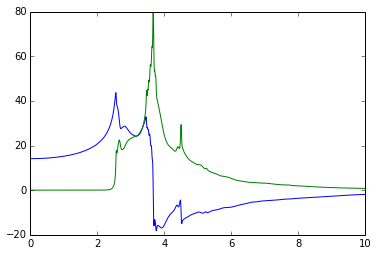

In [16]:
plt.plot(opd.od_jdos_utils.e[:1000],opd.od_optics.epsilon[:1000,0,0,0])
plt.plot(opd.od_jdos_utils.e[:1000],opd.od_optics.epsilon[:1000,1,0,0])

The conductivity

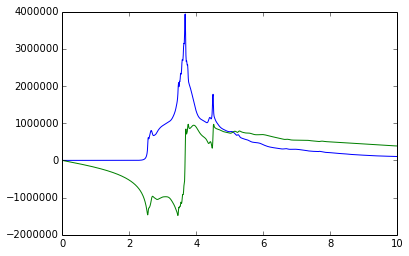

In [19]:
plt.plot(opd.od_jdos_utils.e[:1000],opd.od_optics.conduct[:1000,0])
plt.plot(opd.od_jdos_utils.e[:1000],opd.od_optics.conduct[:1000,1])

The absorption coefficient

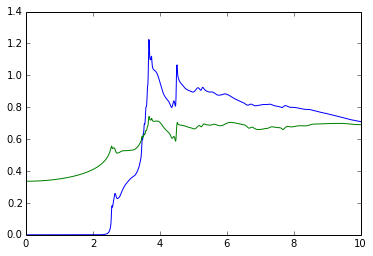

In [30]:
plt.plot(opd.od_jdos_utils.e[:1000],opd.od_optics.absorp[:1000])


Reflectance

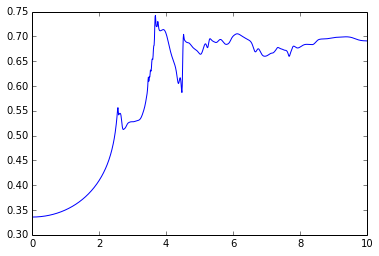

In [31]:
plt.plot(opd.od_jdos_utils.e[:1000],opd.od_optics.reflect[:1000])

Refractive index -- Still needs some work

Loss fn -- without broadening

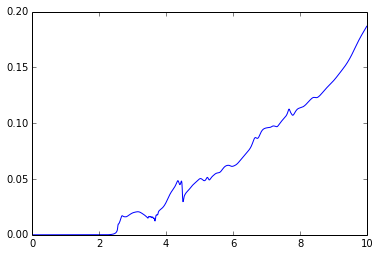

In [36]:
plt.plot(opd.od_jdos_utils.e[:1000],opd.od_optics.loss_fn[:1000,0])